In [2]:
import nbimporter
from Hamiltonian_solver import *

In [4]:
%matplotlib widget

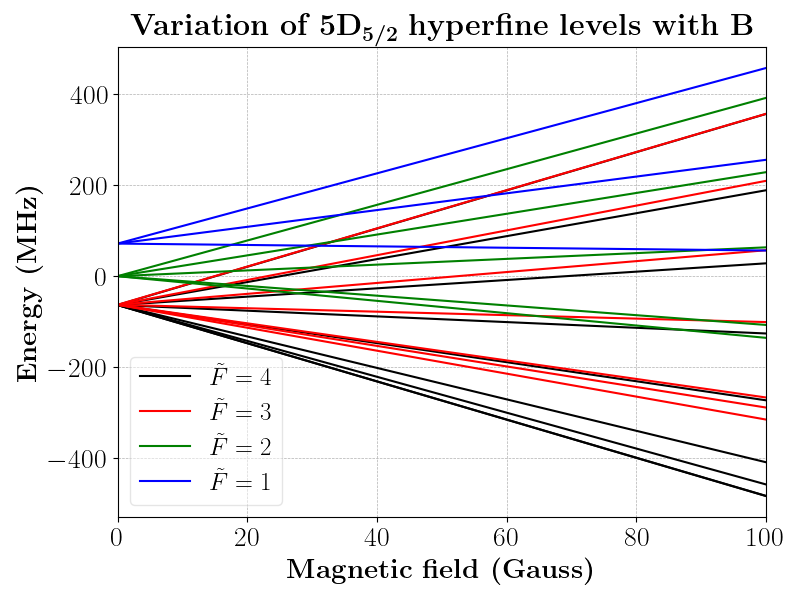

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rcParams
import matplotlib.lines as mlines
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Computer Modern']
rcParams['text.usetex'] = True

# Increase font sizes
rcParams['axes.titlesize'] = 22      # Title of the plot
rcParams['axes.labelsize'] = 20      # Axis labels
rcParams['xtick.labelsize'] = 20     # X tick labels
rcParams['ytick.labelsize'] = 20     # Y tick labels
rcParams['legend.fontsize'] = 18     # Legend text
rcParams['figure.titlesize'] = 22    # Figure-wide title (if used)


# ── field values ───────────────────────────────────────────
Be_values = np.array([0.0001, 100])          # [G]
E0, *_ = Energy_at(Be_values[0])
E1, *_ = Energy_at(Be_values[1])
energy_levels = np.column_stack([E0, E1])     # shape (24, 2)
energy_levels -= 33114420                     # constant offset
energy_levels *= 1e-6                         # convert → MHz

# ── colour & label assignment (24 = 9+7+5+3) ──────────────
colour_blocks = (
    (9,  r"$\tilde{F}=4$", "black"),
    (7,   r"$\tilde{F}=3$", "red"),
    (5,   r"$\tilde{F}=2$", "green"),
    (3,  r"$\tilde{F}=1$", "blue"),
)

labels   = []
colours  = []
for n, lbl, col in colour_blocks:
    labels  += [lbl]  * n
    colours += [col] * n

# ── plot ───────────────────────────────────────────────────
plt.figure(figsize=(8, 6))
for level, col, lbl in zip(energy_levels, colours, labels):
    plt.plot(Be_values, level, color=col, label=lbl)

# show each F only once in the legend
h, l = plt.gca().get_lines(), labels
unique_handles, unique_labels = [], []
for handle, lab in zip(h, l):
    if lab not in unique_labels:
        unique_handles.append(handle)
        unique_labels.append(lab)
plt.legend(unique_handles, unique_labels, framealpha=0.5)

plt.xlabel(r'\textbf{Magnetic field (Gauss)}')
plt.ylabel(r'\textbf{Energy (MHz)}')
plt.title(r'\textbf{Variation of 5D}\boldmath$_{5/2}$ \textbf{hyperfine levels with B}')
plt.xlim(0,100)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig("D52_slope.svg")
plt.show()


C:\Users\Gaurav\AppData\Local\Temp\ipykernel_12092\1408626555.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


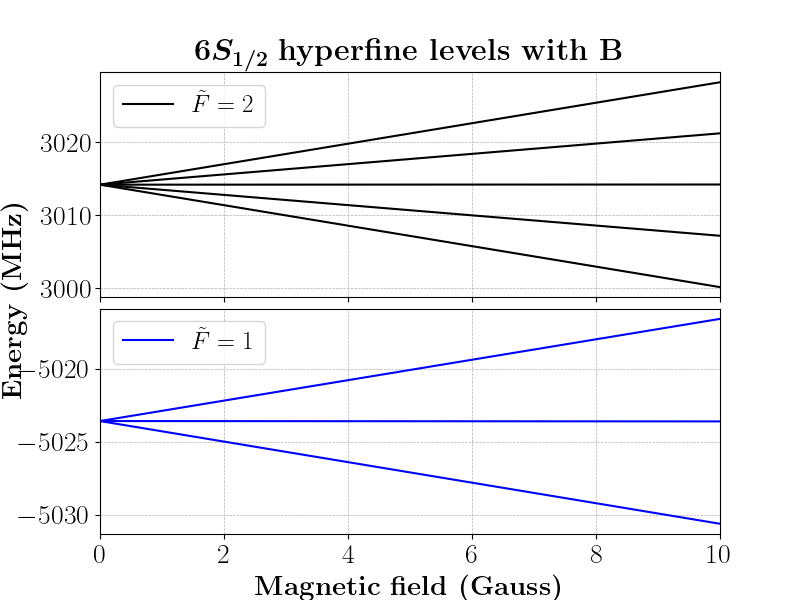

In [122]:


# ── field values ───────────────────────────────────────────
Be_values = np.array([0.0001, 10.0, 50, 100])          # [G]
E0, *_ = S12_Energy_at(Be_values[0])          # low-field eigen-energies
E1, *_ = S12_Energy_at(Be_values[1])          # high-field eigen-energies
energy_levels = np.column_stack([np.diag(E0), np.diag(E1)])     # shape (8, 2)
energy_levels *= 1e-6                         # → MHz


levels_F1 = energy_levels[:3]   # 5 sub-levels
levels_F2 = energy_levels[3:]   # 3 sub-levels


fig, (ax_top, ax_bottom) = plt.subplots(
    nrows=2, ncols=1, figsize=(8, 6), sharex=True, gridspec_kw={'hspace': 0.05}
)

for i, lvl in enumerate(levels_F1):
    ax_bottom.plot(Be_values, lvl, color='blue', label= r"$\tilde{F}=1$" if i == 0 else None)
# ax_top.set_ylabel(r'\textbf{Energy (MHz)}')
# ax_bottom.set_title(r'\boldmath$6S_{1/2}$ \textbf{hyperfine levels with B}')
ax_bottom.grid(True, linestyle='--', linewidth=0.5)
ax_bottom.set_xlim(0, 10)
ax_bottom.legend()

for i, lvl in enumerate(levels_F2):
    ax_top.plot(Be_values, lvl, color='black', label= r"$\tilde{F}=2$" if i == 0 else None)
ax_bottom.set_xlabel(r'\textbf{Magnetic field (Gauss)}')
# ax_bottom.set_ylabel('Energy (MHz)')
ax_top.grid(True, linestyle='--', linewidth=0.5)
ax_top.set_title(r'\boldmath$6S_{1/2}$ \textbf{hyperfine levels with B}')
ax_top.set_xlim(0, 10)
ax_top.legend()
fig.supylabel(r'\textbf{Energy (MHz)}', x=-0.00, va='center', fontsize = 20) 
plt.savefig("S12_slope.svg")
plt.tight_layout()
plt.show()